## Evaluating Random NumberGenerators through Monte Carlo Methods

###  importing libraries

In [67]:
import matplotlib.pyplot as plt
from scipy.integrate import quad
import numpy as np
import random
import time
from scipy.integrate import dblquad 

### Function to estimate π using Monte Carlo simulation

In [68]:
def estimate_pi_and_plot(num_points):
    inside_circle = 0
    approximation = np.empty(num_points)
    
    for i in range(num_points):
        x = random.uniform(-1, 1)
        y = random.uniform(-1, 1)

        if x**2 + y**2 <= 1:
            inside_circle += 1

        approximation[i] = 4 * inside_circle / (i + 1)
    

    # Plotting the approximation over iterations
    plt.semilogx(approximation)
    plt.xlabel("Number of iterations")
    plt.ylabel("Current approximation")
    plt.axhline(np.pi, color="r", alpha=0.5, label="Exact Pi")
    plt.legend()
    plt.show()
    
    return approximation[-1]



###  estimating pie on different sizes of input

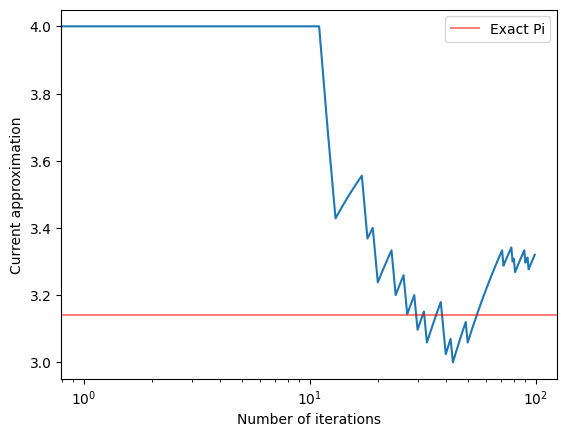

running on input size 100 completed Execution in 0.11266350746154785 seconds


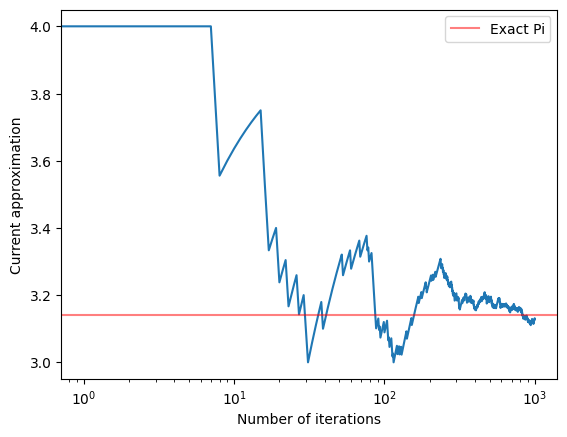

running on input size 1000 completed Execution in 0.11481690406799316 seconds


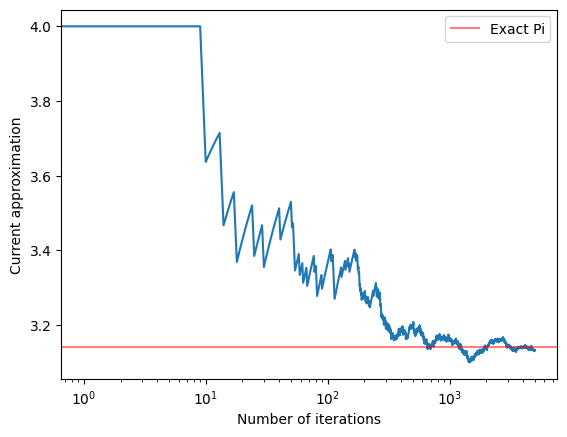

running on input size 5000 completed Execution in 0.12023758888244629 seconds


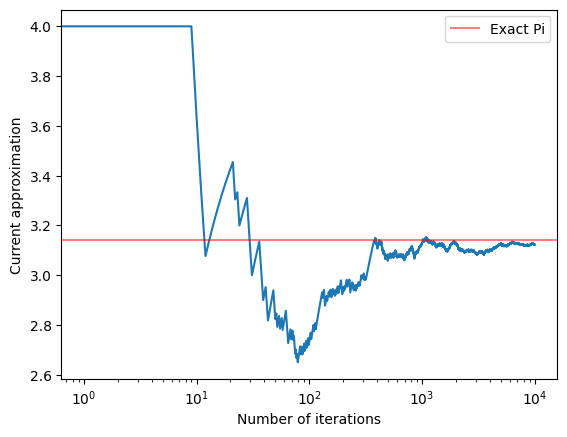

running on input size 10000 completed Execution in 0.18957042694091797 seconds


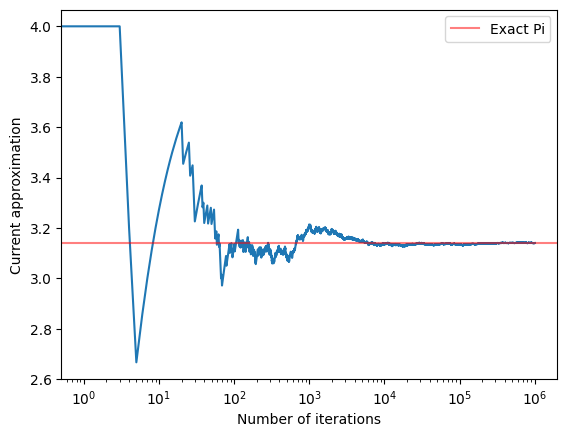

running on input size 1000000 completed Execution in 0.9520087242126465 seconds


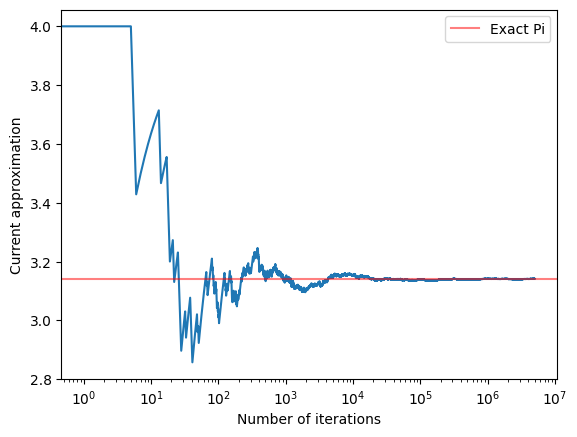

running on input size 5000000 completed Execution in 4.349066972732544 seconds


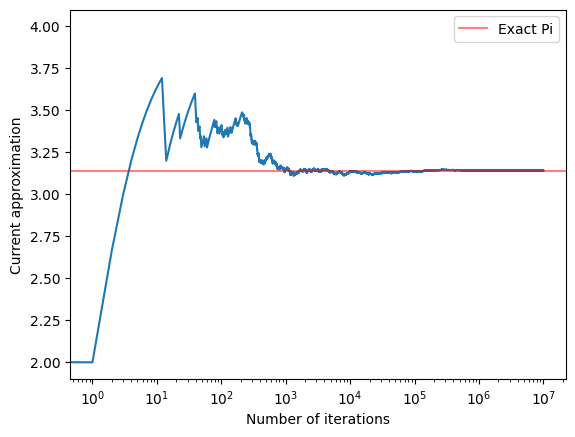

running on input size 10000000 completed Execution in 8.895911693572998 seconds


In [69]:
num_points_array = [100, 1_000, 5_000, 10_000,1_000_000, 5_000_000, 10_000_000]

estimation=[]
for input in num_points_array:
    
    start_time = time.time()
    e=estimate_pi_and_plot(input)
    end_time = time.time()

    
    execution_time = end_time - start_time
    print(f"running on input size {input} completed Execution in {execution_time} seconds")
    estimation.append(e)
    
    


### Visualizing Convergence as Input Size Increases

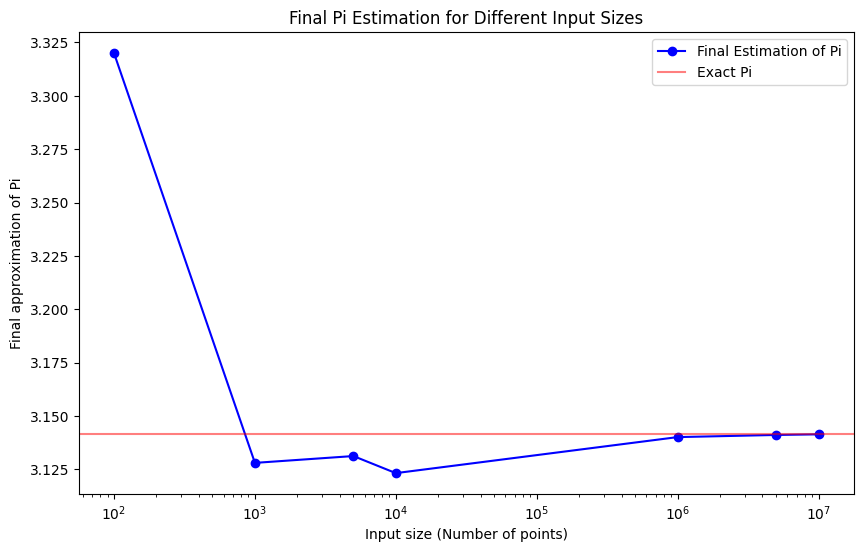

In [70]:
plt.figure(figsize=(10, 6))
plt.plot(num_points_array, estimation, marker='o', color='b', label="Final Estimation of Pi")
plt.axhline(np.pi, color="r", alpha=0.5, label="Exact Pi")
plt.xlabel("Input size (Number of points)")
plt.ylabel("Final approximation of Pi")
plt.legend()
plt.title("Final Pi Estimation for Different Input Sizes")
plt.xscale('log')  # Log scale for input sizes for better visualization
plt.show()

In [71]:
print(num_points_array, estimation)


[100, 1000, 5000, 10000, 1000000, 5000000, 10000000] [np.float64(3.32), np.float64(3.128), np.float64(3.1312), np.float64(3.1232), np.float64(3.14008), np.float64(3.1410832), np.float64(3.1413744)]


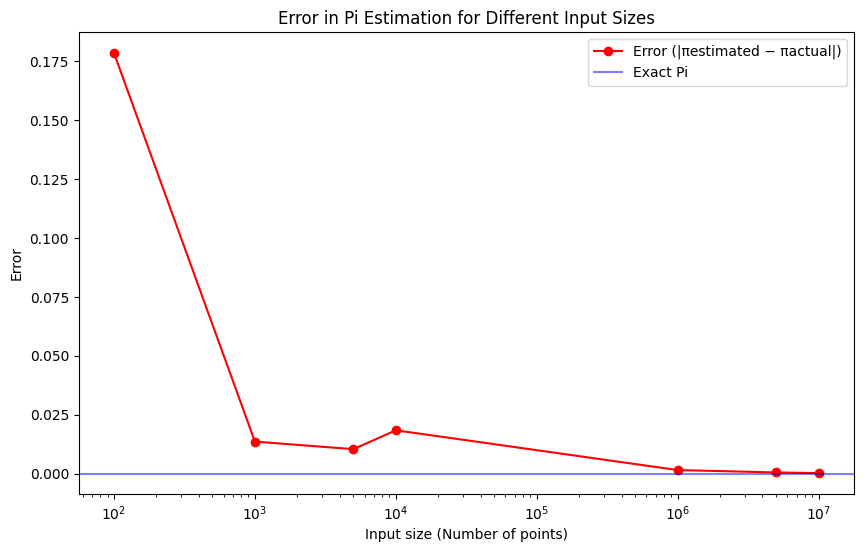

In [72]:
def calculate_and_plot_error(num_points_array, estimation):
    # Ensure that the length of num_points_array matches the length of estimation
    if len(num_points_array) != len(estimation):
        raise ValueError("The length of num_points_array and estimation must be the same.")
    
    error = [abs(e - np.pi) for e in estimation]

    # Visualizing the error for different input sizes
    plt.figure(figsize=(10, 6))
    plt.plot(num_points_array, error, marker='o', color='r', label="Error (|πestimated − πactual|)")
    plt.axhline(0, color="b", alpha=0.5, label="Exact Pi")
    plt.xlabel("Input size (Number of points)")
    plt.ylabel("Error")
    plt.title("Error in Pi Estimation for Different Input Sizes")
    plt.xscale('log')  # Log scale for input sizes for better visualization
    plt.legend()
    plt.show()

calculate_and_plot_error(num_points_array, estimation)


## Numerical Integration Using Monte Carlo Methods

### Function to integrate

In [73]:
def f(x):
    return np.exp(-x**2)
true_integral, _ = quad(f, 0, 1)  # Numerically compute the true integral

### Monte Carlo Integration Function

In [74]:
def monte_carlo_integration(func, a, b, num_samples):
    samples = np.random.uniform(a, b, num_samples)
    function_values = func(samples)
    integral_estimate = (b - a) * np.mean(function_values)
    
    return integral_estimate

### Function to calculate and plot error

In [75]:
def calculate_and_plot_error_1d(a, b, N_values, true_integral):
    estimated_values = []
    error_values = []

    for N in N_values:
        estimated_integral = monte_carlo_integration(f, a, b, N)
        estimated_values.append(estimated_integral)
        error_values.append(abs(estimated_integral - true_integral))
    print(estimated_values)
    # Plotting the error
    plt.figure(figsize=(10, 6))
    plt.plot(N_values, error_values, marker='o', color='r', label="Error (|Estimated - True Integral|)")
    plt.axhline(0, color="b", alpha=0.5, label="True Integral")
    plt.xlabel("Number of Samples (N)")
    plt.ylabel("Error")
    plt.xscale('log')  # Use log scale for N for better visualization
    plt.title("Error in 1D Monte Carlo Integration for Different Sample Sizes")
    plt.legend()
    plt.show()

### Plot Convergence

In [76]:
def plot_monte_carlo_convergence(a, b, N_values, true_integral):
    mc_results = []
    
    # Loop over sample sizes to calculate estimates
    for N in N_values:
        estimated_integral = monte_carlo_integration(f, a, b, N)
        mc_results.append(estimated_integral)
    
    
    # Plotting the convergence of the Monte Carlo estimate
    plt.figure(figsize=(10, 6))
    plt.plot(N_values, mc_results, label="Monte Carlo Estimate", marker='o', linestyle='--')
    plt.axhline(true_integral, color='r', label=f"True Value: {true_integral:.6f}")
    plt.xscale('log')
    plt.xlabel("Number of Samples (N)")
    plt.ylabel("Integral Estimate")
    plt.title("Monte Carlo Integration Convergence")
    plt.legend()
    plt.grid()
    plt.show()

In [77]:
N_values = [100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000, 200000, 500000, 1000000]

[np.float64(0.7091024124683674), np.float64(0.7610825310614387), np.float64(0.7436661844728396), np.float64(0.7528286044377978), np.float64(0.748729944993046), np.float64(0.7470706835244658), np.float64(0.7442451009723747), np.float64(0.7469107397071693), np.float64(0.747287091994768), np.float64(0.7469910693876743), np.float64(0.747376640433761), np.float64(0.7468779062929143), np.float64(0.7468279437168504)]


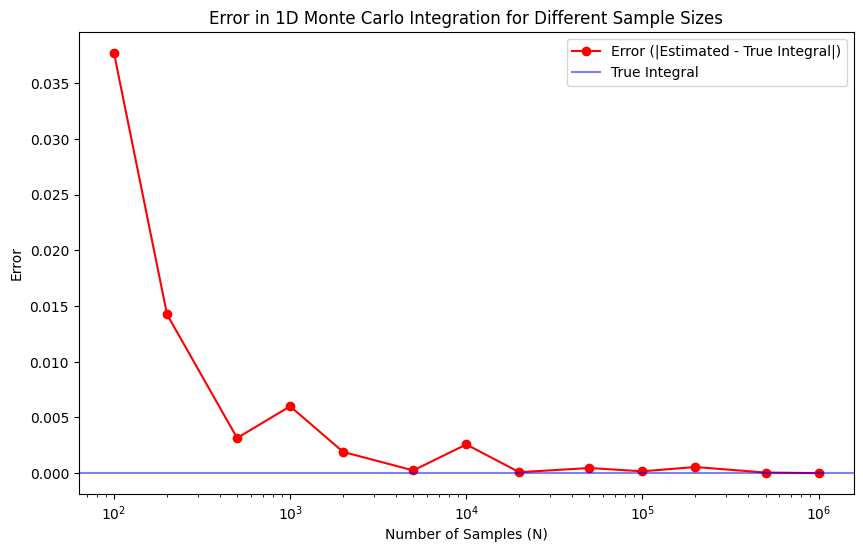

In [78]:
calculate_and_plot_error_1d(0, 1, N_values, true_integral)

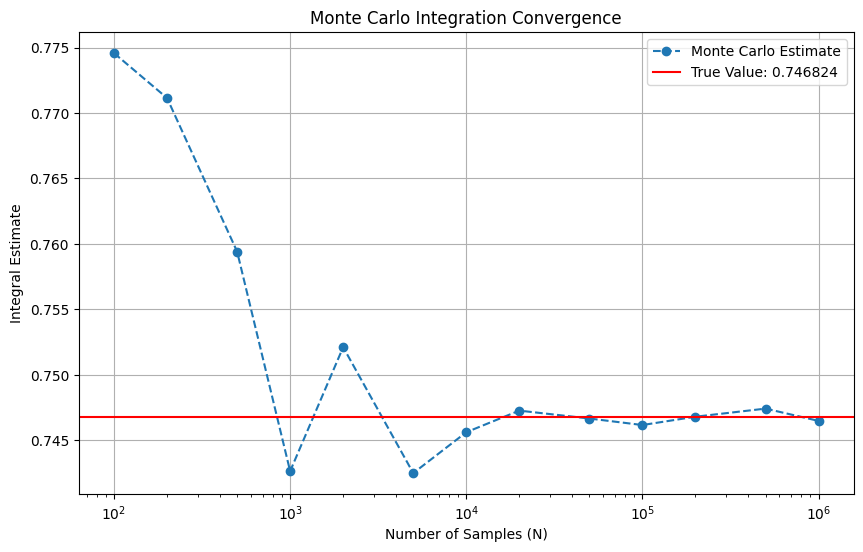

In [79]:
plot_monte_carlo_convergence(0, 1, N_values, true_integral)

### 2D Integration

In [80]:
def f_2d(x, y):
    return np.exp(-(x**2 + y**2))

### Monte Carlo Integration Function for 2D

In [81]:
def monte_carlo_integral_2d(func, a, b, N):
    x_samples = np.random.uniform(a, b, N)
    y_samples = np.random.uniform(a, b, N)
    integral = (b - a)**2 * np.mean(func(x_samples, y_samples))
    return integral

### Monte Carlo Results for 2D

In [82]:
mc_results_2d = [monte_carlo_integral_2d(f_2d, 0, 1, N) for N in N_values]

In [83]:
true_value, _ = dblquad(f_2d, 0, 1, lambda x: 0, lambda x: 1)

### Plot Convergence for 2D

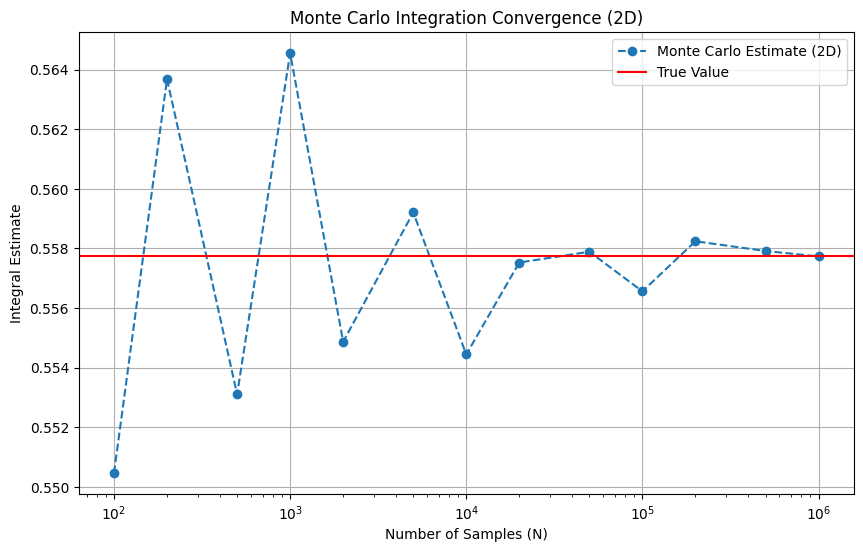

In [84]:
# Plotting the Monte Carlo estimates with the actual value line
plt.figure(figsize=(10, 6))
plt.plot(N_values, mc_results_2d, label="Monte Carlo Estimate (2D)", marker='o', linestyle='--')

# Draw a horizontal line for the true value
plt.axhline(true_value, color='r', linestyle='-', label="True Value")

plt.xlabel("Number of Samples (N)")
plt.ylabel("Integral Estimate")
plt.title("Monte Carlo Integration Convergence (2D)")
plt.xscale('log')
plt.legend()
plt.grid()
plt.show()


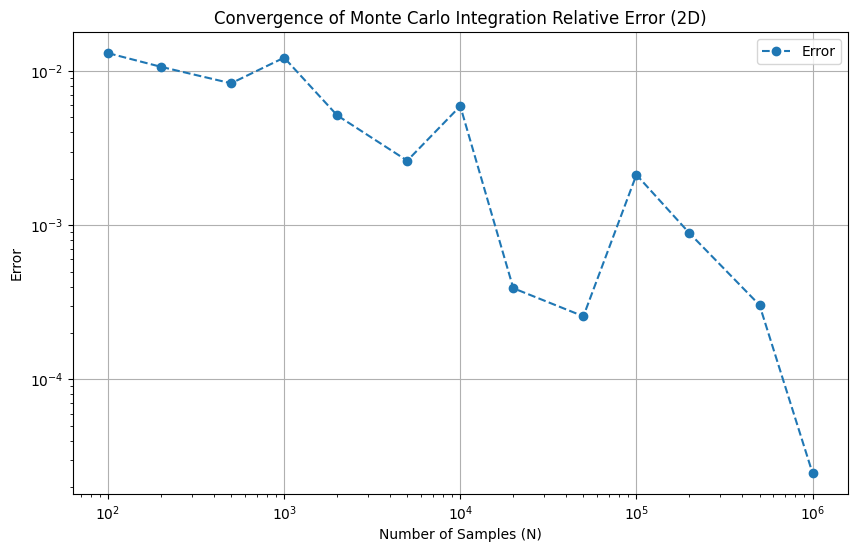

In [85]:
relative_errors = [abs(result - true_value) / abs(true_value) for result in mc_results_2d]

# Plotting the relative error vs number of samples (log-log scale)
plt.figure(figsize=(10, 6))
plt.plot(N_values, relative_errors, label="Error", marker='o', linestyle='--')
plt.yscale('log')  # Log scale for error
plt.xscale('log')  # Log scale for number of samples
plt.xlabel("Number of Samples (N)")
plt.ylabel("Error")
plt.title("Convergence of Monte Carlo Integration Relative Error (2D)")
plt.legend()
plt.grid(True)
plt.show()